<h1><center> Example simulation run for JuliaSEM

<h4> 

* Go to src/parameters/defaultParameters.jl and modify the values as required


* Go to src/initialConditions/defaultInitialConditions.jl and modify the values as required


* Go to run.jl and change the name the simulation

In [5]:
@time include("run.jl")

Total number of nodes on fault: 361
Average node spacing: 133.33333333333334
dt: 0.006065407 s

Time (yr) = 3.0554e-07
Time (yr) = 4.0171e-07
Time (yr) = 4.9787e-07
Time (yr) = 5.9404e-07
Time (yr) = 6.902e-07
Time (yr) = 11.786
Time (yr) = 68.929
Time (yr) = 89.932
Time (yr) = 121.55
Time (yr) = 124.88
Time (yr) = 124.88
Time (yr) = 124.88
Time (yr) = 124.88
Time (yr) = 124.88
Time (yr) = 124.88
Time (yr) = 124.88
Time (yr) = 124.88
Time (yr) = 124.88
Time (yr) = 124.88
Time (yr) = 124.88
Time (yr) = 124.88
Time (yr) = 124.88
Time (yr) = 124.88
Time (yr) = 124.88
Time (yr) = 124.88
Time (yr) = 124.88
Time (yr) = 124.88
Time (yr) = 124.88
Time (yr) = 124.88
Time (yr) = 124.88
Time (yr) = 124.88
Time (yr) = 124.88
Time (yr) = 124.88
Time (yr) = 124.88
Time (yr) = 124.88
Time (yr) = 124.88
Time (yr) = 124.88
Time (yr) = 124.88
Time (yr) = 124.88
Time (yr) = 124.88
Time (yr) = 124.9
Time (yr) = 124.97
Time (yr) = 125.07
Time (yr) = 125.21
Time (yr) = 125.26
Time (yr) = 125.26
Time (yr) = 

┌ Info: Simulation Complete!
└ @ Main /Users/prithvithakur/everything/JuliaSEMCycle/run.jl:30



9624.213376 seconds (19.58 G allocations: 34.619 TiB, 14.59% gc time)


"/Users/prithvithakur/everything/JuliaSEMCycle/plots/dump02"

<h4> 

* The output for this simulation is stored in data/file.jld.


* Output has four matrices:
</h4>

<b>Slip</b>: the cumulative slip on the fault at every timestep.  
<b>SlipVel</b>: the slip velocity on the fault at every timestep.  
<b>Stress</b>: The shear stress on the fault at every timestep.  
<b>time_</b>: the timesteps.

The vertical dimension of the matrices is the depth dimension, and the horizontal dimension is the time series.

In [ ]:
# Include packages if you want to load from file
using JLD2

@load "data/dump02nrfail.jld" SlipVel, Slip, Stress

In [11]:
# Create parameter and setup objects
P = parameters()
S = setup(P);

<h4> Include scripts for calculating cumulative slip every 2 years during interseismic, and every 1 sec during seismic period

In [7]:
include("scripts/cumulative-slip.jl")

cumSlip (generic function with 1 method)

In [8]:
delfsec, delf5yr = cumSlip(output.Slip, output.SlipVel, output.time_);

<h4> Include plots file, and plot the results

In [9]:
include("scripts/plots.jl")

┌ Info: Recompiling stale cache file /Users/prithvithakur/.julia/compiled/v1.0/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1184


cumSlipPlot (generic function with 1 method)

In [13]:
cumSlipPlot(delfsec, delf5yr, S.FltX)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


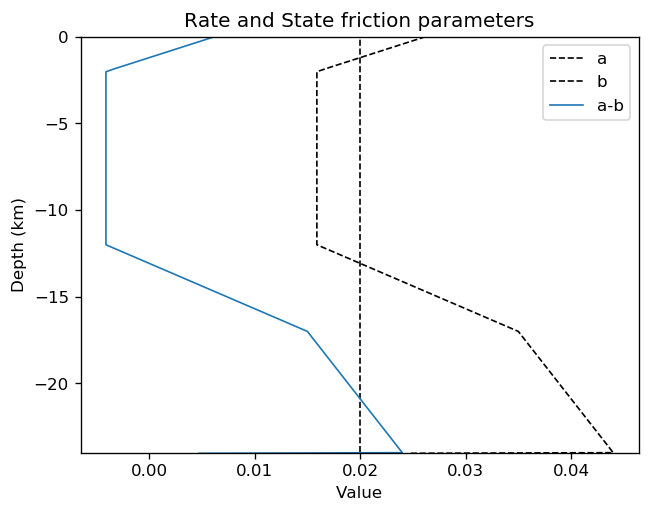

In [16]:
fricPlot(S.cca, S.ccb, S.FltX)

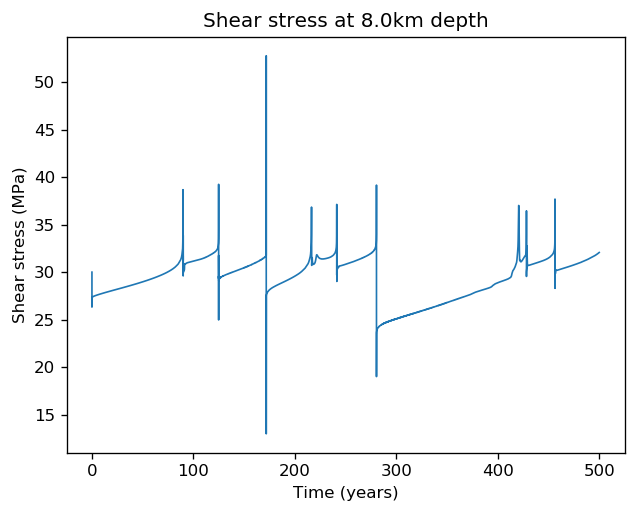

In [17]:
stressPlot(output.Stress, output.time_, S.FltX, P.yr2sec)

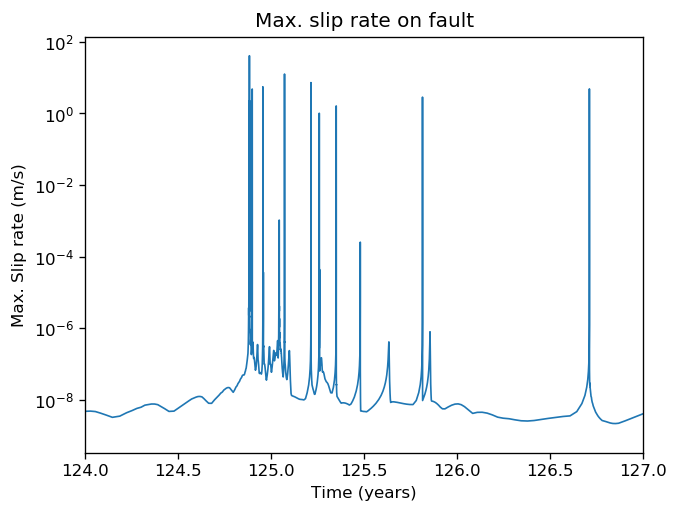

(124, 127)

In [20]:
VfmaxPlot(output.SlipVel, output.time_, P.yr2sec)
xlim([124, 127])

In [15]:
simulation_time

9620.199405026